In [2]:
!pip install -r requirements.txt

from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import time
np.random.seed(42)

In [3]:
mnist = fetch_openml("mnist_784")
X, y = mnist["data"].to_numpy().reshape(-1, 28, 28).astype(float), mnist[
    "target"
].to_numpy().astype(int)
X[X <= 127] = 0.0
X[X > 127] = 1.0
n = X.shape[1] * X.shape[2]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print(X_train.data.shape)
# Shape information
H, W = X_train.shape[1], X_train.shape[2]  # Height and Width

(63000, 28, 28)


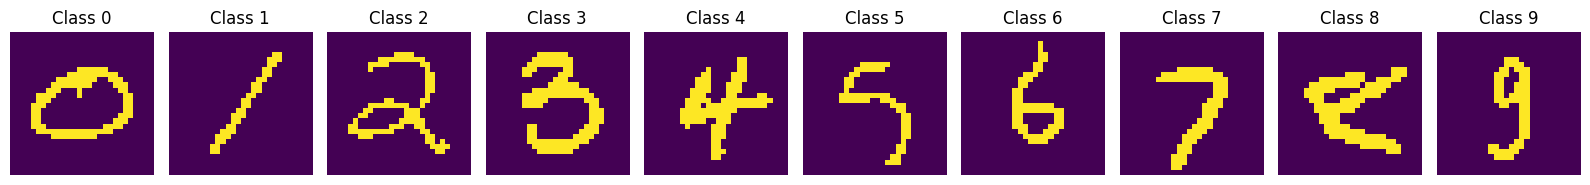

In [4]:
def plot_digits(X_train, y_train, num_classes=10):
    fig, axes = plt.subplots(1,num_classes, figsize=(16, 6))

    for cls in range(num_classes):
        # Select a random image from the class
        class_indices = np.where(y_train == cls)[0]
        random_index = np.random.choice(class_indices)
        random_image = X_train[random_index]

        # Plot the random image
        axes[cls].imshow(random_image)
        axes[cls].set_title(f"Class {cls}")
        axes[cls].axis("off")

    plt.tight_layout()

plot_digits(X_train, y_train)

In [5]:
# Helper function for Laplace smoothing
def laplace_smoothing(count, total, alpha=1, coef=2):
    return (count + alpha) / (total + coef * alpha)


# Naive Bayes Classifier
class NaiveBayesClassifier:
    def __init__(self, num_classes=10):
        self.num_classes = num_classes
        self.P_y = None
        self.P_xy = None

    def train(self, X, y):
        print("Training NaiveBayes...")
        n_samples, H, W = X.shape[0], X.shape[1], X.shape[2]
        #self.P_y = np.random.randn(self.num_classes)
        #self.P_xy = np.random.randn(self.num_classes, H, W)

        # TODO: Compute P(y) and P(x|y)
        counts = np.bincount(y)
        self.P_y = counts / n_samples 
        self.P_xy = np.zeros((self.num_classes, H, W))
        
        for cls in range(self.num_classes):
            X_cls = X[y == cls]  
            count_active = X_cls.sum(axis=0) 
            self.P_xy[cls] = laplace_smoothing(count_active, len(X_cls))
            
        print("Training completed.")

    def predict(self, X):
        print("TEsting NaiveBayes...")
        #predictions = np.random.randint(0,high=self.num_classes, size=X.shape[0])
        # TODO: Compute predictions
        predictions = []
        for x in X:
            log_probs = [] 
    
            for cls in range(self.num_classes):
                log_p_y = np.log(self.P_y[cls])  
                log_p_xy = np.sum(
                    x * np.log(self.P_xy[cls]) + (1 - x) * np.log(1 - self.P_xy[cls])
                )  
                log_probs.append(log_p_y + log_p_xy) 
    
            predictions.append(np.argmax(log_probs))  
            

        return predictions

In [6]:
# Logistic Regression Classifier
class LogisticRegressionClassifier:
    def __init__(self, num_classes=10):
        self.num_classes = num_classes
        #self.lr_model = None # TODO: Initialize your logistic regression model here

        self.lr_model = LogisticRegression(
            max_iter=1000, multi_class='multinomial', solver='lbfgs'
        )

    def train(self, X, y):
        print("Training logistic regression...")
        # Todo: Train your logistic regression model here
    
        self.lr_model.fit(X, y)
        print("Training completed.")
        
    def predict(self, X):
        print("Predicting with logistic regression...")
        #predictions = np.random.randint(0,high=self.num_classes, size=X.shape[0])
        # TODO: Compute predictions
                     
        predictions = self.lr_model.predict(X)   
        return predictions
    
    def get_weights(self):
        if self.lr_model is None:
            return None
        return self.lr_model.coef_ # This is For visualization purposes only

In [7]:

nb_classifier = NaiveBayesClassifier()

start_train = time.time()
nb_classifier.train(X_train, y_train)
end_train = time.time()

start_predict = time.time()
nb_preds = nb_classifier.predict(X_test)
end_predict = time.time()

nb_accuracy = accuracy_score(y_test, nb_preds)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(f"Naive Bayes Training Time: {end_train - start_train:.4f} seconds")
print(f"Naive Bayes Prediction Time: {end_predict - start_predict:.4f} seconds\n")

scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train.reshape(-1, n))
X_test_lr = scaler.transform(X_test.reshape(-1, n))
lr_classifier = LogisticRegressionClassifier()

start_train = time.time()
lr_classifier.train(X_train_lr, y_train)
end_train = time.time()

start_predict = time.time()
lr_preds = lr_classifier.predict(X_test_lr)
end_predict = time.time()

lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Logistic Regression Training Time: {end_train - start_train:.4f} seconds")
print(f"Logistic Regression Prediction Time: {end_predict - start_predict:.4f} seconds")


Training NaiveBayes...
Training completed.
TEsting NaiveBayes...
Naive Bayes Accuracy: 83.59%
Naive Bayes Training Time: 0.1265 seconds
Naive Bayes Prediction Time: 1.8189 seconds

Training logistic regression...


/home/edoar/SSY316/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training completed.
Predicting with logistic regression...
Logistic Regression Accuracy: 90.36%
Logistic Regression Training Time: 104.6247 seconds
Logistic Regression Prediction Time: 0.0365 seconds


TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...
TEsting NaiveBayes...


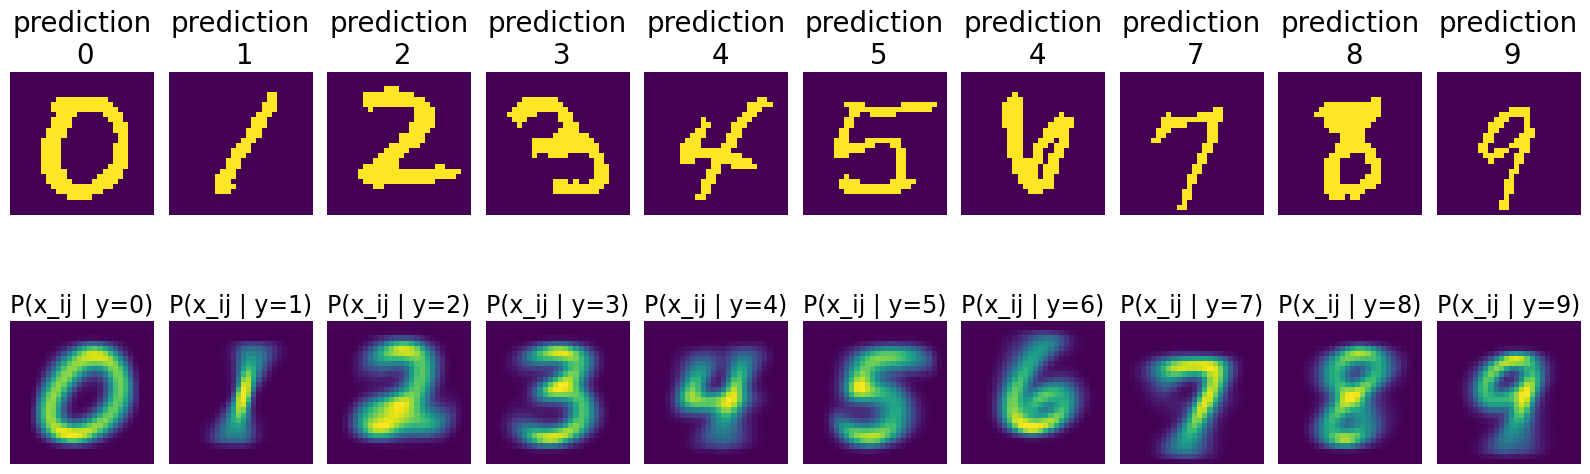

In [8]:
# Function to plot a random image and its corresponding P_xy for each class
def plot_random_image_and_p_xy(nb_classifier, X_test, y_test, num_classes=10):
    fig, axes = plt.subplots(2, num_classes, figsize=(16, 6))

    for cls in range(num_classes):
        # Select a random image from the class
        class_indices = np.where(y_test == cls)[0]
        random_index = np.random.choice(class_indices)
        random_image = X_test[random_index]
        prediction = nb_classifier.predict(random_image.reshape(1, H, W))[0]

        # Plot the random image
        axes[0, cls].imshow(random_image)
        axes[0, cls].set_title(f"prediction\n {int(prediction)}", fontsize=20)
        axes[0, cls].axis("off")

        # Plot the P_xy for the class
        axes[1, cls].imshow(nb_classifier.P_xy[cls])
        axes[1, cls].set_title(f"P(x_ij | y={cls})", fontsize=17)
        axes[1, cls].axis("off")

    plt.tight_layout()

# Example usage
plot_random_image_and_p_xy(nb_classifier, X_train, y_train)

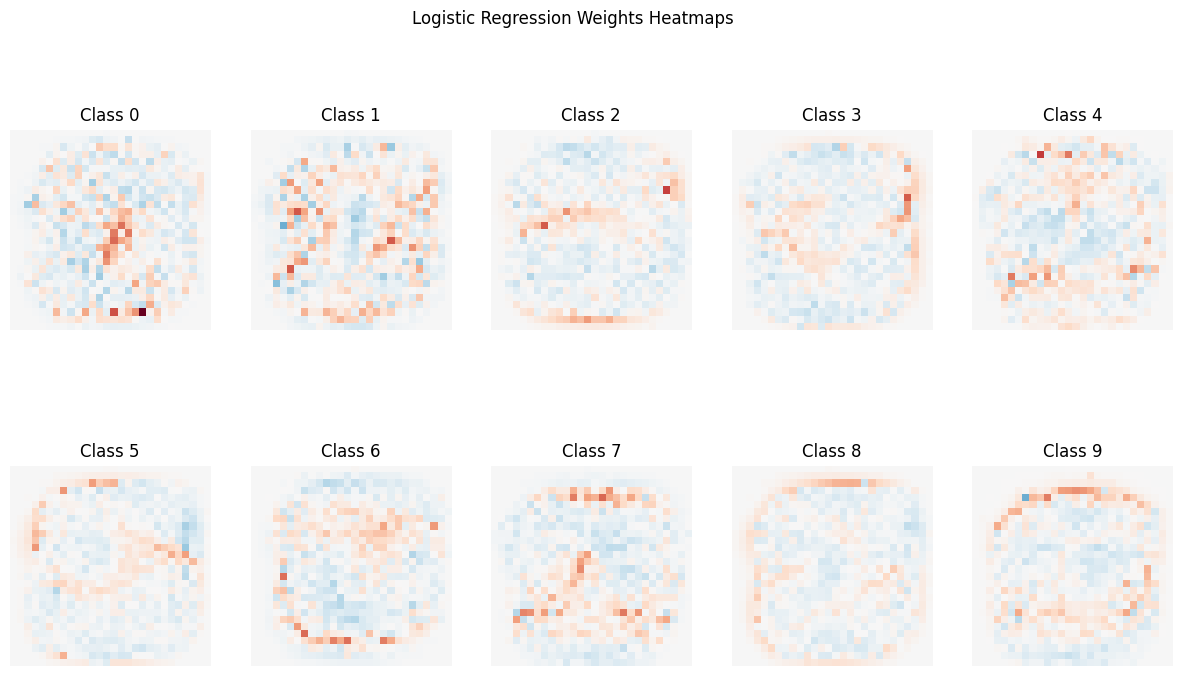

In [9]:
# Visualize weights for each class
coef = lr_classifier.get_weights()
if coef is None:
    print("No weights found")
    coef = np.random.randn(10, 28, 28)
weights = coef.reshape(10, 28, 28)
scale = np.abs(coef).max()

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(
        weights[i],
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    plt.title(f"Class {i}")
    plt.axis("off")
plt.suptitle("Logistic Regression Weights Heatmaps")
plt.show()

In [10]:
def test_by_class(classifier, X_test, y_test, model_name="Model"):
    classes = np.unique(y_test)  # 고유 클래스 목록
    for cls in classes:
        print(f"\n{model_name} - Testing for Class {cls}...")

        X_test_class = X_test[y_test == cls]
        y_test_class = y_test[y_test == cls]

        start_predict = time.time()
        preds = classifier.predict(X_test_class)
        end_predict = time.time()

        accuracy = accuracy_score(y_test_class, preds)

        print(f"Class {cls} Accuracy: {accuracy * 100:.2f}%")
        print(f"Class {cls} Prediction Time: {end_predict - start_predict:.4f} seconds")

print("===== Naive Bayes Classifier =====")
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train, y_train)  
test_by_class(nb_classifier, X_test, y_test, model_name="Naive Bayes")

print("\n===== Logistic Regression Classifier =====")
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train.reshape(-1, X_train.shape[1] * X_train.shape[2]))
X_test_lr = scaler.transform(X_test.reshape(-1, X_test.shape[1] * X_test.shape[2]))

lr_classifier = LogisticRegressionClassifier()
lr_classifier.train(X_train_lr, y_train)  
test_by_class(lr_classifier, X_test_lr, y_test, model_name="Logistic Regression")


===== Naive Bayes Classifier =====
Training NaiveBayes...
Training completed.

Naive Bayes - Testing for Class 0...
TEsting NaiveBayes...
Class 0 Accuracy: 88.87%
Class 0 Prediction Time: 0.1677 seconds

Naive Bayes - Testing for Class 1...
TEsting NaiveBayes...
Class 1 Accuracy: 95.50%
Class 1 Prediction Time: 0.2080 seconds

Naive Bayes - Testing for Class 2...
TEsting NaiveBayes...
Class 2 Accuracy: 81.31%
Class 2 Prediction Time: 0.1473 seconds

Naive Bayes - Testing for Class 3...
TEsting NaiveBayes...
Class 3 Accuracy: 80.39%
Class 3 Prediction Time: 0.2209 seconds

Naive Bayes - Testing for Class 4...
TEsting NaiveBayes...
Class 4 Accuracy: 79.71%
Class 4 Prediction Time: 0.1463 seconds

Naive Bayes - Testing for Class 5...
TEsting NaiveBayes...
Class 5 Accuracy: 75.08%
Class 5 Prediction Time: 0.1498 seconds

Naive Bayes - Testing for Class 6...
TEsting NaiveBayes...
Class 6 Accuracy: 90.25%
Class 6 Prediction Time: 0.1509 seconds

Naive Bayes - Testing for Class 7...
TEsting N

/home/edoar/SSY316/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training completed.

Logistic Regression - Testing for Class 0...
Predicting with logistic regression...
Class 0 Accuracy: 95.61%
Class 0 Prediction Time: 0.0146 seconds

Logistic Regression - Testing for Class 1...
Predicting with logistic regression...
Class 1 Accuracy: 97.12%
Class 1 Prediction Time: 0.0533 seconds

Logistic Regression - Testing for Class 2...
Predicting with logistic regression...
Class 2 Accuracy: 85.91%
Class 2 Prediction Time: 0.0118 seconds

Logistic Regression - Testing for Class 3...
Predicting with logistic regression...
Class 3 Accuracy: 87.50%
Class 3 Prediction Time: 0.0189 seconds

Logistic Regression - Testing for Class 4...
Predicting with logistic regression...
Class 4 Accuracy: 89.85%
Class 4 Prediction Time: 0.0309 seconds

Logistic Regression - Testing for Class 5...
Predicting with logistic regression...
Class 5 Accuracy: 85.11%
Class 5 Prediction Time: 0.0037 seconds

Logistic Regression - Testing for Class 6...
Predicting with logistic regressio